# Higher-order networks

In this notebook, we will
1. Create
   1. Hypergraphs
   2. Simplicial complexes
   3. Dihypergraphs
2. Explore simple properties
3. Visualize these networks

in XGI.

XGI provides `Hypergraph`, `SimplicialComplex`, and `DiHypergraph` as data structures for higher-order networks. These data structures provide functionality for manipulating and accessing properties and information from higher-order networks.

We start off by loading the XGI library.

In [1]:
import matplotlib.pyplot as plt
import xgi

In [2]:
xgi.__version__

'0.10'

### Creating a hypergraph

![hypergraph diagram](../assets/hypergraph_diagram.png){width=25%}

XGI stores hypergraphs as bipartite networks so that one can efficiently query node and edge relations. In addition, the hypergraph and each node and edge can have properties.

Creating a hypergraph can be done in several ways, but here, we will build a hypergraph node-by-node and edge-by-edge.

In [3]:
H_build = xgi.Hypergraph()
H_build.add_edge([1, 2], idx="a")
H_build.add_node(0)
H_build.add_edges_from([[3, 4], [0, 2, 3]])
H_build.add_nodes_from([9, 10])

XGI automatically assigns unique edge IDs (if a user doesn't specify the ID)

Why NodeViews and EdgeViews? These allow users to access many different properties and data structures from nodes and edges in a much simpler way. We will cover this more in depth later. For now, we can get the edges of which each node is a part and the nodes in each edge as follows:

In [4]:
print("List of node memberships and edge members:")
print(H_build.nodes.memberships())
print(H_build.edges.members())
print("\nMemberships of a particular node and members of a particular edge:")
print(H_build.nodes.memberships(2))
print(H_build.edges.members("a"))

List of node memberships and edge members:
{1: {'a'}, 2: {1, 'a'}, 0: {1}, 3: {0, 1}, 4: {0}, 9: set(), 10: set()}
[{1, 2}, {3, 4}, {0, 2, 3}]

Memberships of a particular node and members of a particular edge:
{1, 'a'}
{1, 2}


In [5]:
print(H_build)

Unnamed Hypergraph with 7 nodes and 3 hyperedges


### Creating a simplicial complex

By definition, a simplicial complex $K$ is valid if for any simplex $\sigma \in K$, all faces $\omega \subset \sigma$ are also $\omega \in K$. The functions ``SC.add_simplex`` and ``SC.add_simplices_from`` take care of this directly.

We can check this easily by asking how many edges are present in the simplicial complex versus the hypergraph.
Previously, when we added the simplex/hyperedge ``[0, 2, 3]``, there were no sub-edges. The closure requirement means that the three edges (``[0, 2], [0, 3], [2, 3]``) must be added as well.

We will build a simplicial complex node-by-node and edge-by-edge. This is different than a hypergraph in that *downward closure* is satisfied where every possible sub-interaction exists.

In [6]:
SC_build = xgi.SimplicialComplex()
SC_build.add_simplex([1, 2], idx="a")
SC_build.add_node(0)
SC_build.add_simplices_from([[3, 4], [0, 2, 3]])
SC_build.add_nodes_from([9, 10])

In [7]:
print(SC_build)

Unnamed SimplicialComplex with 7 nodes and 6 simplices


In [8]:
print(H_build.edges.members())
print([set(e) for e in SC_build.edges.members()])

[{1, 2}, {3, 4}, {0, 2, 3}]
[{1, 2}, {3, 4}, {0, 2, 3}, {2, 3}, {0, 2}, {0, 3}]


### Creating a directed hypergraph (dihypergraph)

![image](../assets/dihypergraph_diagram.png){width=25%}

A *directed hypergraph* (or *dihypergraph*), is a hypergraph which keeps track of senders and receivers in a given interaction. As defined in "Hypergraph Theory: An Introduction" by Alain Bretto, dihypergraphs are a set of nodes and a set of directed edges.

We define a directed hyperedge $\overrightarrow{e_i} \in E$ as an ordered pair $(e^+_i, e^-_i)$, where the *tail* of the edge, $e^+_i$, is the set of senders and the *head*, $e^-_i$, is the set of receivers. Both are subsets of the node set. We define the members of $\overrightarrow{e_i}$ as $e_i = e^+_i \cup e^-_i$ and the edge size as $s_i = |e_i|$.

These types of hypergraphs are useful for representing, for example, chemical reactions (which have reactants and products) and emails (sender and receivers).

We start by building a dihypergraph.

We will build a directed hypergraph node-by-node and edge-by-edge. Each edge now contains a set of inputs (tail) and outputs (head).

In [9]:
DH = xgi.DiHypergraph()

DH.add_node(1, name="test")
DH.add_edge(
    [{1, 2, 3}, {3, 4}]
)  # Notice that the head and the tail need not be disjoint.

DH.add_nodes_from([4, 5, 6])
edges = [[{1, 2}, {5, 6}], [{4}, {1, 3}]]
DH.add_edges_from(edges)
DH["name"] = "test"

print("Now that we've added nodes and edges, we have a " + str(DH))

Now that we've added nodes and edges, we have a DiHypergraph named test with 6 nodes and 3 hyperedges


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x131bbc2f0>,
  <matplotlib.collections.PathCollection at 0x131bc42d0>))

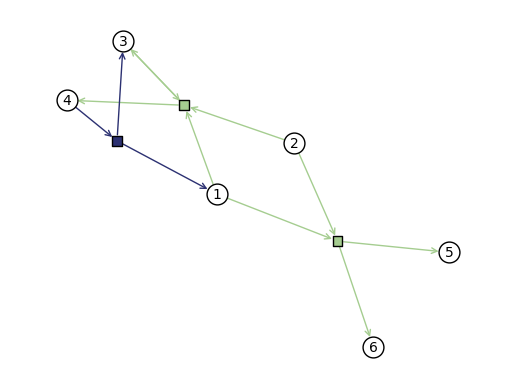

In [10]:
xgi.draw_bipartite(DH, node_labels=True, node_size=15)

In [11]:
print("Edge 0:")
print(f"directed edge: {DH.edges.dimembers(0)}")
print(f"undirected edge: {DH.edges.members(0)}")
print(f"tail: {DH.edges.tail(0)}")
print(f"head: {DH.edges.head(0)}")

Edge 0:
directed edge: ({1, 2, 3}, {3, 4})
undirected edge: {1, 2, 3, 4}
tail: {1, 2, 3}
head: {3, 4}


## Now try this:

* Create a hypergraph representing academics A, B, C, and D with papers co-authored by (A, B) and (A, B C)
* Create a directed hypergraph representing the chemical reaction $A + B \rightarrow C + D$